In [106]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# Récupération des données

In [107]:
X_train = numpy.load('X_train.npy')

## Remise en forme des données

In [108]:
numpy.random.seed(48)
indices = numpy.random.choice(X_train.shape[0],9)
images = X_train[indices]

## Ajout d'un axe (channel) pour pouvoir utiliser la fonction

In [110]:
images_number, channels, width, height = images.shape[0], 1, images.shape[1], images.shape[2]
images_mod = images.reshape((images_number, channels, width, height))

In [111]:
images_mod.shape

(9, 1, 64, 64)

# Création d'un générateur de rotation

In [112]:
rotation_30 = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=180,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format='channels_first',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32')

In [120]:
images_rot30_gen = rotation_30.flow(images_mod,
                                    y=None,
                                    batch_size=32,
                                    shuffle=False,
                                    sample_weight=None,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix='',
                                    save_format='png',
                                    subset=None
                                   )

## Récupération du batch transformé

In [121]:
images_rot30 = images_rot30_gen.next()

In [122]:
len(images_rot30)

9

## Images initiales

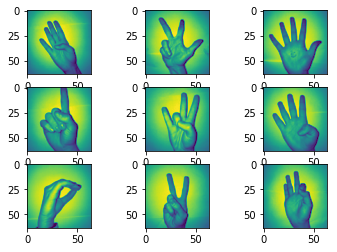

In [123]:
for i in range(len(images)):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i]);

## Images transformées

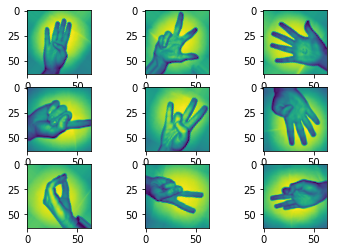

In [124]:
for i in range(images_rot30.shape[0]):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_rot30[i, 0, ...]);

## Nouveau set de transformation

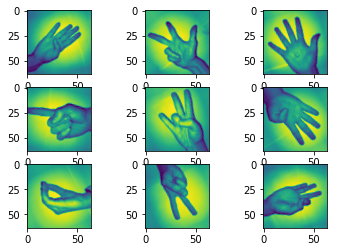

In [125]:
images_rot30 = images_rot30_gen.next()
for i in range(images_rot30.shape[0]):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_rot30[i, 0, ...]);

# Création d'un générateur d'offset

In [138]:
rotation_30 = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=50,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format='channels_first',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32')

In [139]:
images_rot30_gen = rotation_30.flow(images_mod,
                                    y=None,
                                    batch_size=32,
                                    shuffle=False,
                                    sample_weight=None,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix='',
                                    save_format='png',
                                    subset=None
                                   )

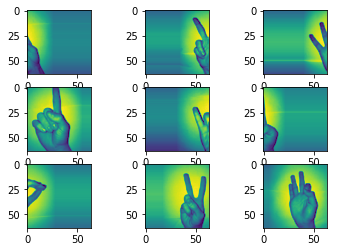

In [140]:
images_rot30 = images_rot30_gen.next()
for i in range(images_rot30.shape[0]):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_rot30[i, 0, ...]);

# Création d'un générateur de déformations

In [156]:
rotation_30 = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=50,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=False,
    preprocessing_function=None,
    data_format='channels_first',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32')

In [157]:
images_rot30_gen = rotation_30.flow(images_mod,
                                    y=None,
                                    batch_size=32,
                                    shuffle=False,
                                    sample_weight=None,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix='',
                                    save_format='png',
                                    subset=None
                                   )

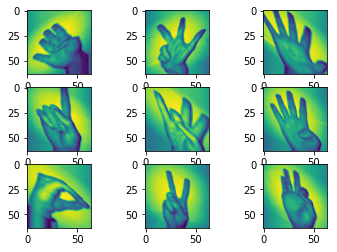

In [158]:
images_rot30 = images_rot30_gen.next()
for i in range(images_rot30.shape[0]):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_rot30[i, 0, ...]);

# Création d'un générateur avec ZCA

In [186]:
rotation_30 = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=True,
    zca_epsilon=1e-6,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=False,
    preprocessing_function=None,
    data_format='channels_first',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32')

c:\applications\logiciels\python\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [189]:
images_rot30_gen = rotation_30.fit(images_mod)

In [190]:
images_rot30_gen = rotation_30.flow(images_mod,
                                    y=None,
                                    batch_size=32,
                                    shuffle=False,
                                    sample_weight=None,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix='',
                                    save_format='png',
                                    subset=None
                                   )

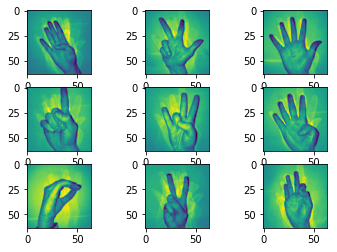

In [191]:
images_rot30 = images_rot30_gen.next()
for i in range(images_rot30.shape[0]):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_rot30[i, 0, ...]);

# Création d'un générateur de normalization

In [198]:
rotation_30 = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=False,
    preprocessing_function=None,
    data_format='channels_first',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32')

c:\applications\logiciels\python\lib\site-packages\keras_preprocessing\image\image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
c:\applications\logiciels\python\lib\site-packages\keras_preprocessing\image\image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [199]:
images_rot30_gen = rotation_30.fit(images_mod)

In [200]:
images_rot30_gen = rotation_30.flow(images_mod,
                                    y=None,
                                    batch_size=32,
                                    shuffle=False,
                                    sample_weight=None,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix='',
                                    save_format='png',
                                    subset=None
                                   )

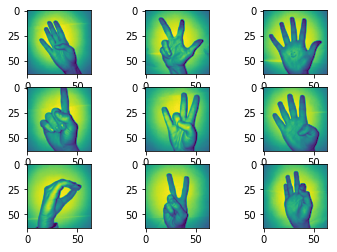

In [201]:
images_rot30 = images_rot30_gen.next()
for i in range(images_rot30.shape[0]):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_rot30[i, 0, ...]);